In [28]:
from helper_functions import weatherClassificationModelv1 as wc0
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt


model = wc0()
model.load_state_dict(torch.load('../models/weather_classification_modelv1.pth'))

<All keys matched successfully>

In [42]:
image_path = "C://large_files//data_weather//val/shine/shine62.jpg"

transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

image = transform(Image.open(image_path)).unsqueeze(dim=0)

In [43]:
def maps(layer):

    if layer==1:
        layer = model.conv1
    else:
        layer = model.conv2

    feature_maps = []

    def hook_fn(module, input, output):
        feature_maps.append(output)

    hook = layer.register_forward_hook(hook_fn)

    with torch.no_grad():
        _ = model(image)

    hook.remove()

    feature_maps = feature_maps[0].squeeze(0)
    num_feature_maps = feature_maps.shape[0]

    fig, axes = plt.subplots(4, 4, figsize=(15, 15))

    for i in range(num_feature_maps):
        ax = axes[i // 4, i % 4]
        ax.imshow(feature_maps[i].detach().cpu().numpy(), cmap='viridis')
        ax.axis('off')


    plt.subplots_adjust(wspace=0.2, hspace=0.2)
    plt.show()


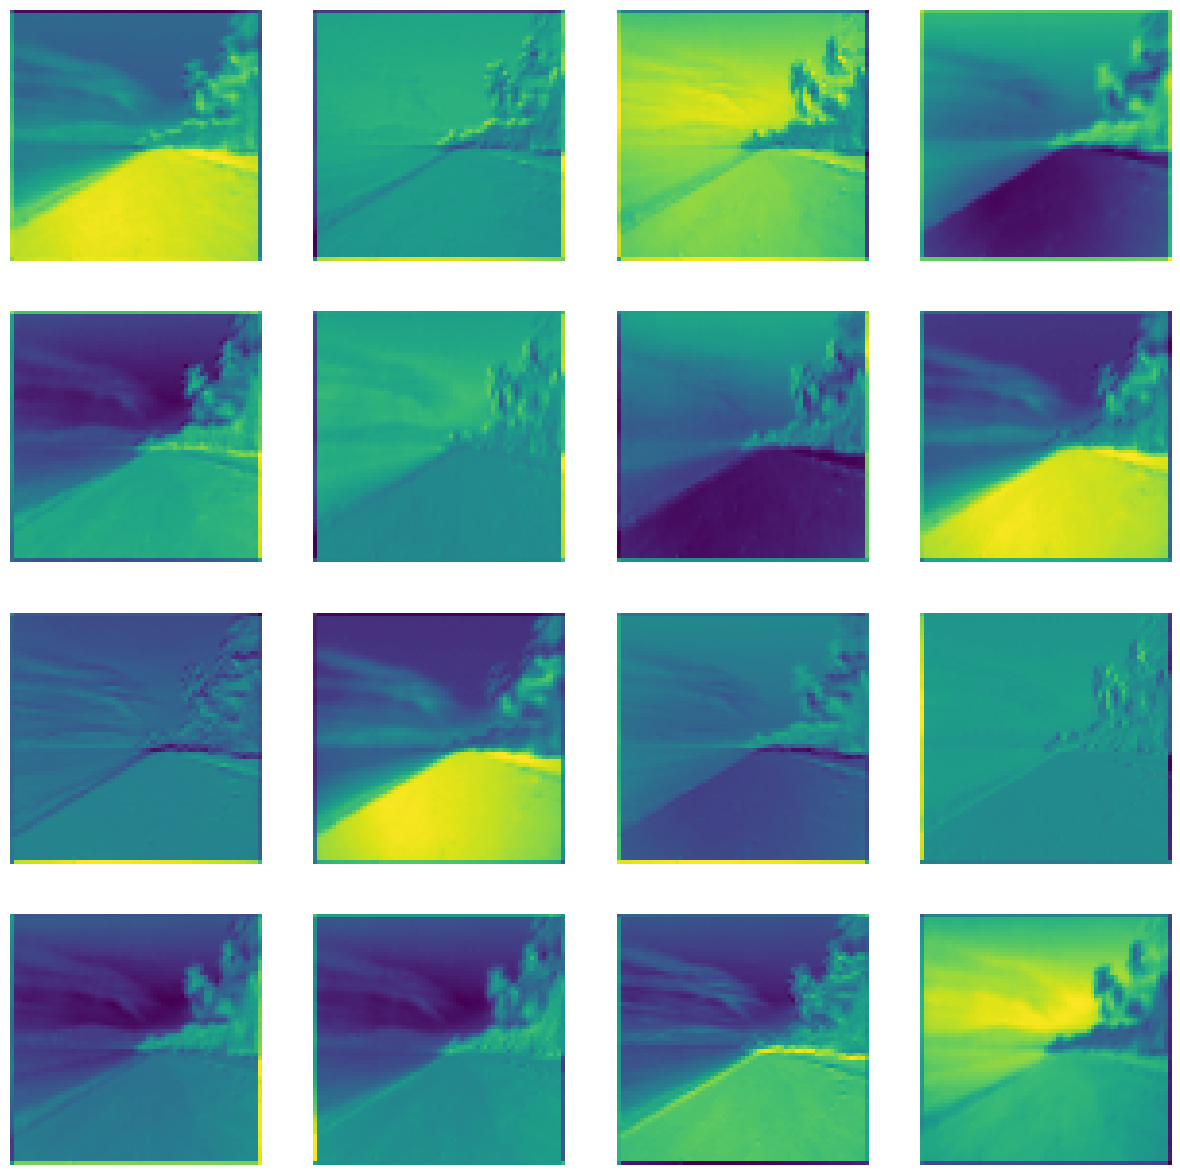

In [44]:
maps(1)

IndexError: index 4 is out of bounds for axis 0 with size 4

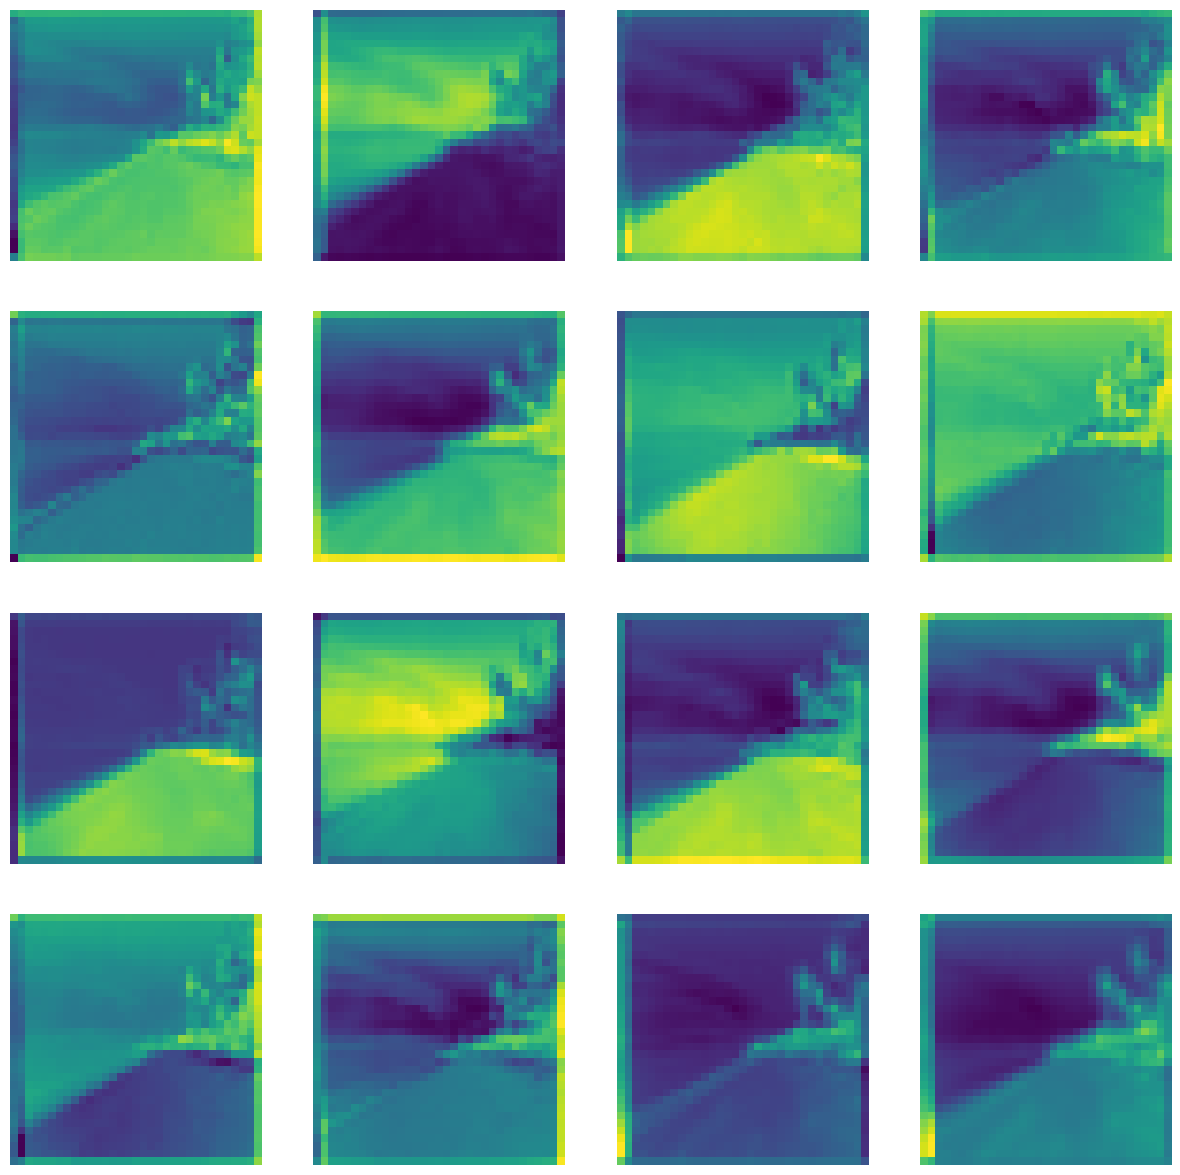

In [45]:
maps(2)